In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:
df_with_info = pd.read_csv("data/generated/data_with_info.csv", delimiter=";", encoding='utf-8')

In [3]:
df_with_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 21 columns):
Unnamed: 0         350 non-null int64
idx                350 non-null int64
category           350 non-null object
name               350 non-null object
url                350 non-null object
keywords           337 non-null object
desc               298 non-null object
desc_rapport       52 non-null object
url_corrected      77 non-null object
url_final          350 non-null object
ydt_id             350 non-null object
Label              350 non-null object
timeset            0 non-null float64
isseed             350 non-null object
seedrank           350 non-null int64
subscribercount    350 non-null int64
videocount         350 non-null int64
viewcount(100s)    350 non-null int64
country            350 non-null object
publishedat        350 non-null object
daysactive         350 non-null int64
dtypes: float64(1), int64(7), object(13)
memory usage: 57.5+ KB


In [4]:
df_with_info.rename(columns = {"viewcount(100s)":"viewcount_100s"}, inplace=True)

In [5]:
df_with_info.head(1)

,Unnamed: 0,idx,category,name,url,keywords,desc,desc_rapport,url_corrected,url_final,...,Label,timeset,isseed,seedrank,subscribercount,videocount,viewcount_100s,country,publishedat,daysactive
0,0,196,Technologie et informatique,Léo - Techmaker,https://www.youtube.com/channel/UCRhyS_ylPQ5GW...,Technologie-ingénierie-électronique-Do it your...,« Salut c'est Léo de la chaine TechMaker ! Tes...,NaN,NaN,https://www.youtube.com/channel/UCRhyS_ylPQ5GW...,...,Léo - TechMaker,NaN,yes,296,347983,186,289879,FR,2015-11-23T00:31:45.000Z,1422


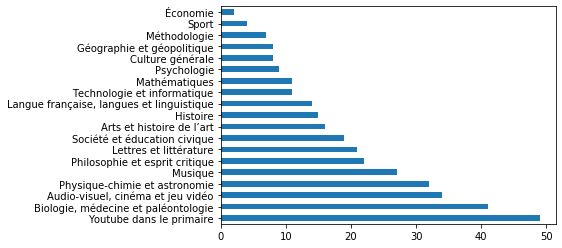

In [6]:
plt.figure();

pd.Series(df_with_info['category']).value_counts().plot(kind='barh')

In [7]:
#df_with_info['category'].value_counts().plot.barh()

8

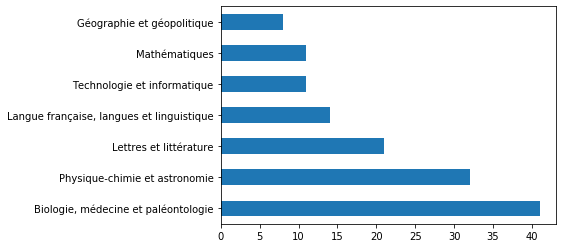

In [8]:
not_science = ['Histoire'
               , 'Arts et histoire de l’art'
               , 'Youtube dans le primaire'
               , 'Sport'
               , 'Méthodologie'
               , 'Audio-visuel, cinéma et jeu vidéo'
               , 'Musique'
               , 'Société et éducation civique'
               #, 'Langue française, langues et linguistique'
               , 'Économie'
               , 'Philosophie et esprit critique'
               , 'Culture générale'
               , 'Psychologie']
df_science = df_with_info[~df_with_info['category'].isin(not_science)]
df_science['category'].unique().tolist()

plt.figure();

pd.Series(df_science['category']).value_counts().plot(kind='barh')

pd.Series(df_science['category']).value_counts()

min(pd.Series(df_science['category']).value_counts())

In [9]:
group = df_science.groupby('category')

In [10]:


df_subset_8 = group.apply(lambda x: x.sort_values(by=["viewcount_100s"], ascending=False)[:8])

df_subset_8 = df_subset_8.reset_index(drop=True)

df_subset_8[["idx","name", "ydt_id", "category","viewcount_100s"]].head(16)

,idx,name,ydt_id,category,viewcount_100s
0,159,Dans Ton Corps,UCOchT7ZJ4TXe3stdLW1Sfxw,"Biologie, médecine et paléontologie",539458
1,160,Dirty Biology,UCtqICqGbPSbTN09K1_7VZ3Q,"Biologie, médecine et paléontologie",426949
2,155,Cédrik Jurassik,UCpZODzFU3297WtWnnB8j6vQ,"Biologie, médecine et paléontologie",48042
3,181,Professeur Feuillage,UCGl2QLR344ry4Y20RV9dM3g,"Biologie, médecine et paléontologie",42352
4,175,M-Gigantoraptor,UCNEWnUoWy0h8_6Fyt_59N1Q,"Biologie, médecine et paléontologie",30029
5,180,Prof SVT 71,UCsziE76G6NjpCTTwoSEbwYQ,"Biologie, médecine et paléontologie",26445
6,179,Primum non nocere,UC9BnGZLT4iPaJtDOXYwQuHQ,"Biologie, médecine et paléontologie",24569
7,153,Bio Logique,UCG-O7s_-BlT_mWGlYw-SEHg,"Biologie, médecine et paléontologie",23254
8,54,Hugo décrypte,UCAcAnMF0OrCtUep3Y4M-ZPw,Géographie et géopolitique,207182
9,56,MisterGeopolitix,UCX9lsdsTKfTi1eqoyL-RS-Q,Géographie et géopolitique,19897


In [11]:
urls = get_urls("ydt_id", False, False, df_subset_8)
print(urls)

['UCOchT7ZJ4TXe3stdLW1Sfxw,UCtqICqGbPSbTN09K1_7VZ3Q,UCpZODzFU3297WtWnnB8j6vQ,UCGl2QLR344ry4Y20RV9dM3g,UCNEWnUoWy0h8_6Fyt_59N1Q,UCsziE76G6NjpCTTwoSEbwYQ,UC9BnGZLT4iPaJtDOXYwQuHQ,UCG-O7s_-BlT_mWGlYw-SEHg,UCAcAnMF0OrCtUep3Y4M-ZPw,UCX9lsdsTKfTi1eqoyL-RS-Q,UCKnQwqEcbWMu1qdOnayfbWA,UCp6rG9KqxwsdwgVY1D2dqWA,UCd_ho3fwV39cuki6hKUSwZg,UCBo6bcRr2D9UnkMbgeEEMbw,UCIogkaC9Y6sRbzcz04_66oA,UCCEnEn-a-1XI3VKMzvk2fSg,UCofQxJWd4qkqc7ZgaLkZfcw,UCiS98AQGiMcu-cTIO9iZv_g,UC3rbgmQApsfAhvQ5Oa0azsQ,UC1ipKNAWcHhmcqKUEGg1RMg,UCV7LqtLm0-NW4x1W5AUu-QA,UCXw2TBQp-GEhM1bsBASuv8g,UC0efyK_-Athm8yhyjNSqndQ,UCbMwZeGQwv3lrwELbojTYNw,UCvpC3r6uMufMM5qb3c0QtDw,UCFyaA9LoooQrLiDvP0R7GpA,UCAmsG64faWTwlpGCfHQ3mig,UCrpqKTyAxJWSpwmA_BfWTjw,UC32vOdZp-NN4eZZhJrUNR6w,UC2XIqez2q8sk2bd8YcAok5Q,UCvFUHbJieL0AzVHHbgfhk7A,UCO-YDXoZJNVJFmF1UJ17rEw,UCaDqmzanCq4ZYhdEm0Df9Qg,UC4PasDd25MXqlXBogBw9CAg,UCo-O74A4qVz6nq5cfCIee6w,UC0NCbj8CxzeCGIF6sODJ-7A,UCWty1tzwZW_ZNSp5GVGteaA,UCgkhWgBGRp0sdFy2MHDWfSg,UCDjXdK_Jg_0OqRlRhKiZ_Rw,UC9ciJmrLjCCkzTjQom6UlS

In [12]:
df_subset_8['category'].unique().tolist()

['Biologie, médecine et paléontologie',
 'Géographie et géopolitique',
 'Langue française, langues et linguistique',
 'Lettres et littérature',
 'Mathématiques',
 'Physique-chimie et astronomie',
 'Technologie et informatique']

In [13]:
for category in df_subset_8['category'].unique().tolist():
    urls = get_urls("ydt_id", False, False, df_subset_8[df_subset_8['category']==category])
    print("")
    print(category)
    print("")
    print(urls[0])


Biologie, médecine et paléontologie

UCOchT7ZJ4TXe3stdLW1Sfxw,UCtqICqGbPSbTN09K1_7VZ3Q,UCpZODzFU3297WtWnnB8j6vQ,UCGl2QLR344ry4Y20RV9dM3g,UCNEWnUoWy0h8_6Fyt_59N1Q,UCsziE76G6NjpCTTwoSEbwYQ,UC9BnGZLT4iPaJtDOXYwQuHQ,UCG-O7s_-BlT_mWGlYw-SEHg

Géographie et géopolitique

UCAcAnMF0OrCtUep3Y4M-ZPw,UCX9lsdsTKfTi1eqoyL-RS-Q,UCKnQwqEcbWMu1qdOnayfbWA,UCp6rG9KqxwsdwgVY1D2dqWA,UCd_ho3fwV39cuki6hKUSwZg,UCBo6bcRr2D9UnkMbgeEEMbw,UCIogkaC9Y6sRbzcz04_66oA,UCCEnEn-a-1XI3VKMzvk2fSg

Langue française, langues et linguistique

UCofQxJWd4qkqc7ZgaLkZfcw,UCiS98AQGiMcu-cTIO9iZv_g,UC3rbgmQApsfAhvQ5Oa0azsQ,UC1ipKNAWcHhmcqKUEGg1RMg,UCV7LqtLm0-NW4x1W5AUu-QA,UCXw2TBQp-GEhM1bsBASuv8g,UC0efyK_-Athm8yhyjNSqndQ,UCbMwZeGQwv3lrwELbojTYNw

Lettres et littérature

UCvpC3r6uMufMM5qb3c0QtDw,UCFyaA9LoooQrLiDvP0R7GpA,UCAmsG64faWTwlpGCfHQ3mig,UCrpqKTyAxJWSpwmA_BfWTjw,UC32vOdZp-NN4eZZhJrUNR6w,UC2XIqez2q8sk2bd8YcAok5Q,UCvFUHbJieL0AzVHHbgfhk7A,UCO-YDXoZJNVJFmF1UJ17rEw

Mathématiques

UCaDqmzanCq4ZYhdEm0Df9Qg,UC4PasDd25MXqlXBogBw9CA

In [14]:
get_urls("ydt_id", False, False, df_subset_8)[0]

'UCOchT7ZJ4TXe3stdLW1Sfxw,UCtqICqGbPSbTN09K1_7VZ3Q,UCpZODzFU3297WtWnnB8j6vQ,UCGl2QLR344ry4Y20RV9dM3g,UCNEWnUoWy0h8_6Fyt_59N1Q,UCsziE76G6NjpCTTwoSEbwYQ,UC9BnGZLT4iPaJtDOXYwQuHQ,UCG-O7s_-BlT_mWGlYw-SEHg,UCAcAnMF0OrCtUep3Y4M-ZPw,UCX9lsdsTKfTi1eqoyL-RS-Q,UCKnQwqEcbWMu1qdOnayfbWA,UCp6rG9KqxwsdwgVY1D2dqWA,UCd_ho3fwV39cuki6hKUSwZg,UCBo6bcRr2D9UnkMbgeEEMbw,UCIogkaC9Y6sRbzcz04_66oA,UCCEnEn-a-1XI3VKMzvk2fSg,UCofQxJWd4qkqc7ZgaLkZfcw,UCiS98AQGiMcu-cTIO9iZv_g,UC3rbgmQApsfAhvQ5Oa0azsQ,UC1ipKNAWcHhmcqKUEGg1RMg,UCV7LqtLm0-NW4x1W5AUu-QA,UCXw2TBQp-GEhM1bsBASuv8g,UC0efyK_-Athm8yhyjNSqndQ,UCbMwZeGQwv3lrwELbojTYNw,UCvpC3r6uMufMM5qb3c0QtDw,UCFyaA9LoooQrLiDvP0R7GpA,UCAmsG64faWTwlpGCfHQ3mig,UCrpqKTyAxJWSpwmA_BfWTjw,UC32vOdZp-NN4eZZhJrUNR6w,UC2XIqez2q8sk2bd8YcAok5Q,UCvFUHbJieL0AzVHHbgfhk7A,UCO-YDXoZJNVJFmF1UJ17rEw,UCaDqmzanCq4ZYhdEm0Df9Qg,UC4PasDd25MXqlXBogBw9CAg,UCo-O74A4qVz6nq5cfCIee6w,UC0NCbj8CxzeCGIF6sODJ-7A,UCWty1tzwZW_ZNSp5GVGteaA,UCgkhWgBGRp0sdFy2MHDWfSg,UCDjXdK_Jg_0OqRlRhKiZ_Rw,UC9ciJmrLjCCkzTjQom6UlSw